In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.polynomial.polynomial as poly

%matplotlib inline

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
cd /Users/austinmcdonald/Desktop/research/Side Projects/CEvNS

/Users/austinmcdonald/Desktop/research/Side Projects/CEvNS


In [4]:
os.listdir()

['.DS_Store', 'nuMUp.csv', 'theory', 'detector', 'nuMU.csv', 'nuE.csv']

In [5]:
nuMU = np.genfromtxt('nuMU.csv',delimiter=',')
nuMUp = np.genfromtxt('nuMUp.csv',delimiter=',')
nuE   = np.genfromtxt('nuE.csv',delimiter=',')

In [6]:
max(nuMUp[:,1])

0.037836939018160938

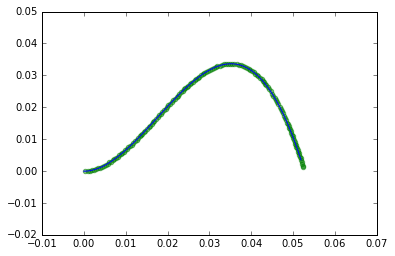

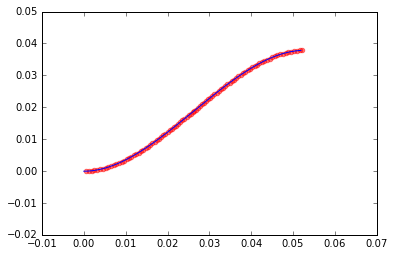

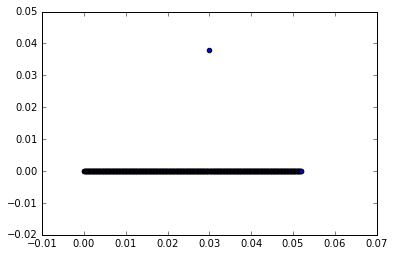

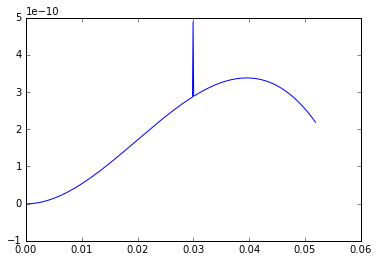

In [37]:
Xnew = np.linspace(1e-9,0.052,500,endpoint=False)

coefs = poly.polyfit(nuE[:,0], nuE[:,1], 3)
ffit1 = poly.polyval(Xnew, coefs)
plt.scatter(nuE[:,0],nuE[:,1],color='g',alpha=0.5)
plt.plot(Xnew, ffit1)
plt.show()

coefs = poly.polyfit(nuMU[:,0], nuMU[:,1], 3)
ffit2 = poly.polyval(Xnew, coefs)
plt.scatter(nuMU[:,0],nuMU[:,1],color='r',alpha=0.5)
plt.plot(Xnew, ffit2)
plt.show()

xplace = find_nearest(Xnew,0.03)
xloc = np.where(Xnew==xplace)[0][0]
eh = np.zeros(500)
eh[xloc] = 0.037836939018160938
ffit3 = eh
plt.scatter(Xnew,eh)
plt.show()


tot = ffit1+ffit2+ffit3
norm = 1e-7
tot = tot/sum(tot)
tot = tot*norm
plt.plot(Xnew,tot)
plt.show()



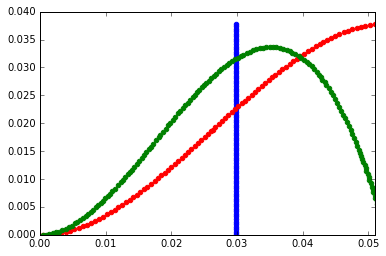

In [38]:
plt.scatter(nuMUp[:,0],nuMUp[:,1],color='b')
plt.scatter(nuMU[:,0],nuMU[:,1],color='r')
plt.scatter(nuE[:,0],nuE[:,1],color='g')
plt.ylim(0,0.04)
plt.xlim(0,0.051)
plt.show()

In [39]:
Gf = 1.166e-5 #1/gev**2
M = 20* 0.935 # nuclear massof neon in gev
Qw = 10 - (1-4*0.231)*10

In [40]:
def cross(Ev,T):
    con = (Gf**2 * M * Qw**2)/(8*3.14)
    par = 2-(M*T/(Ev**2))
    return con*par

In [41]:
cross(.3,1e-6)

1.728016518598786e-08

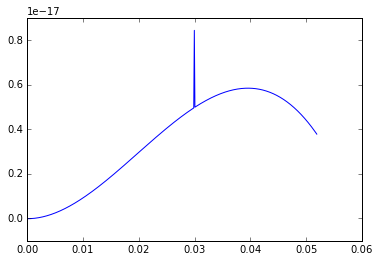

In [42]:
plt.plot(Xnew,tot*cross(Xnew,0))

In [43]:
dx =Xnew[5]-Xnew[4]
sum(tot*cross(Xnew,0))

1.7281960589671325e-15

In [44]:
dx

0.00010399999799999999

In [48]:
recoil = np.linspace(1e-9,250e-6,500,endpoint=False)
en = []
for x in range(0,len(recoil)):
    dx =Xnew[5]-Xnew[4]
    hold = sum(tot*cross(Xnew,recoil[x]))*dx
    en.append(hold)
    
sum(en)*0.00627*6.02e23

2424172793980403.5

[]

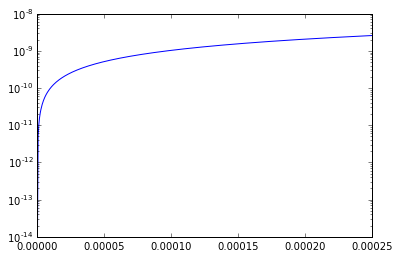

In [46]:
plt.plot(recoil,en)
plt.semilogy()

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


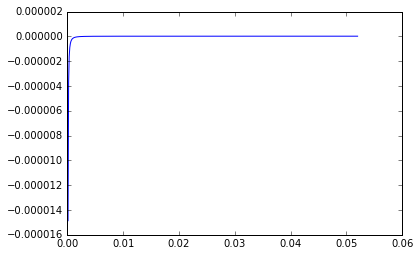

In [75]:
plt.plot(Xnew,cross(Xnew,1e-6))
plt.show()